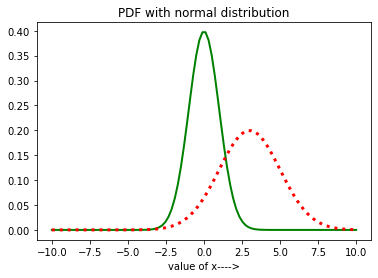

In [44]:
# Question 1(a)


from numpy import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from mpl_toolkits import mplot3d
u = np.linspace(-10,10,100)                                             # To generate 100 random points

plt.plot(u,norm.pdf(u,0,1),linewidth='2',color='green')                  #This will produce normal Pdf with N(0,1)

plt.plot(u,norm.pdf(u,3,2),linestyle=':',linewidth='3',color='red')      #This will produce normal Pdf with N(3,2)
plt.title("PDF with normal distribution")
plt.xlabel('value of x---->')

plt.show()
#comments------>
#if the variance is higher,then the curve will be broader and shorter. 
#if the variance is small,the curve will be narrow and tall in the middle.

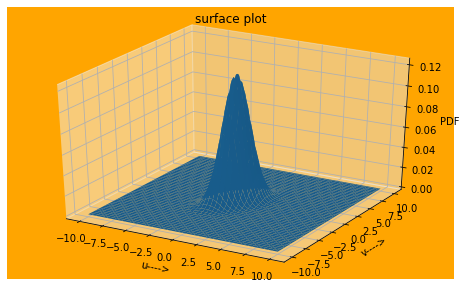

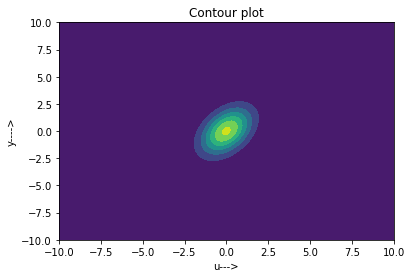

In [76]:
#Question 1(b)


from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from mpl_toolkits import mplot3d
u = np.linspace(-10,10,100)                               #To generate 100 random points along x axis
v = np.linspace(-10,10,100)                               #To generate 100 random points along x axis
u, v = np.meshgrid(u, v)                                  # converting u,v into 2D
mu = np.array([0, 0])                                     #Giving Value of mean vector
sig = np.array([[ 1, 0.6], [0.6, 2]])                     #giving value of variance vector
pos = np.dstack((u,v))                                    #converting u,v in diagonal form
rv = multivariate_normal(mu,sig)                          #calculating bivariate normal distribution
z = rv.pdf(pos)

#plotting Surface plot 
fig = plt.figure(figsize =(8, 5)) 
ax = plt.axes(projection ='3d')  
ax.plot_surface(u, v, z) 
ax.set_title('surface plot') 
ax.set_xlabel('u---->')
ax.set_ylabel('v---->')
ax.set_zlabel('PDF')
ax.set_facecolor("orange")
plt.show() 

#plotting Contour plot 
fig, ax = plt.subplots(1, 1)
ax.contourf(u, v, z) 
ax.set_title('Contour plot') 
ax.set_xlabel('u--->') 
ax.set_ylabel('y---->') 
plt.show() 

In [13]:
#Question 2.....

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
Values=pd.read_csv('iris.data')               #Loading data set from given csv file
Values.head()                                 #showing starting 5 data set 

,Sepal_length,Sepal_Width,Petal_length,Petal_Width,Species_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
Values.groupby('Species_name').size()       #showing total number of different species 

Species_name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [24]:
#from above table we can see each group has 50 datas...hence the prior probability of each group is (1/3)
from sklearn.preprocessing import LabelEncoder      
le = LabelEncoder()

In [25]:
Values['Species_name'] = le.fit_transform(Values['Species_name'])   #converting Species_name from alphabetic value into numeric form
Values.head()

,Sepal_length,Sepal_Width,Petal_length,Petal_Width,Species_name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
from sklearn.model_selection import train_test_split
X = Values.drop(columns = ['Species_name'])              #assigning the independent variable to X
Y = Values['Species_name']                               #assigning dependent variable to Y
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30) #splitting the test and train data, and takinng test size=30%

In [36]:
print(x_test) #printing test data for reference

     Sepal_length  Sepal_Width  Petal_length  Petal_Width
75            6.6          3.0           4.4          1.4
118           7.7          2.6           6.9          2.3
106           4.9          2.5           4.5          1.7
115           6.4          3.2           5.3          2.3
126           6.2          2.8           4.8          1.8
23            5.1          3.3           1.7          0.5
49            5.0          3.3           1.4          0.2
24            4.8          3.4           1.9          0.2
105           7.6          3.0           6.6          2.1
60            5.0          2.0           3.5          1.0
32            5.2          4.1           1.5          0.1
30            4.8          3.1           1.6          0.2
43            5.0          3.5           1.6          0.6
12            4.8          3.0           1.4          0.1
125           7.2          3.2           6.0          1.8
138           6.0          3.0           4.8          1.8
143           

In [37]:
from sklearn.naive_bayes import GaussianNB   
model=GaussianNB()
model.fit(x_train,y_train)                      #designing the model based on Naive bayes theorem
y_pred= model.predict(x_test)
y_compare=pd.DataFrame({'true values':y_test,"predicted values":y_pred})
y_compare

,true values,predicted values
75,1,1
118,2,2
106,2,1
115,2,2
126,2,2
23,0,0
49,0,0
24,0,0
105,2,2
60,1,1


In [38]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix              
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,'%')     #it gives the accuracy of model
confusion_matrix(y_test, y_pred)                                      #it gives the confusion matrix


Accuracy: 95.55555555555556 %


array([[16,  0,  0],
       [ 0, 11,  1],
       [ 0,  1, 16]], dtype=int64)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().